In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def generate_data(num_points, noise_std = 0.1):
    
    x_values = np.sort(np.random.uniform(0,2*np.pi, num_points))

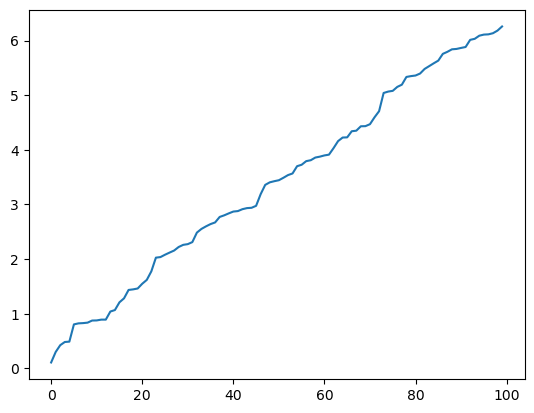

In [15]:
num_points = 100    
x_values = np.sort(np.random.uniform(0,2*np.pi, num_points))
x_values
plt.plot(x_values)

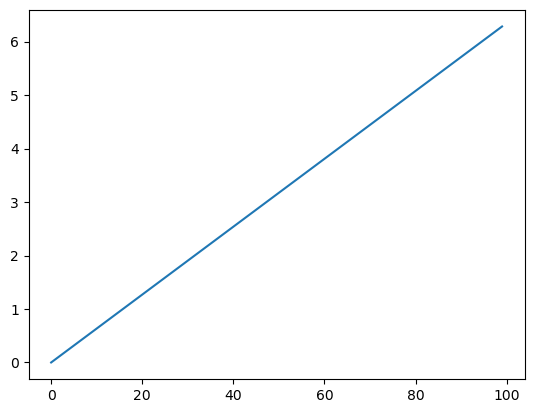

In [16]:
num_points = 100    
x_values = np.linspace(0, 2*np.pi, num_points)
x_values
plt.plot(x_values)